In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
osvhntrain = pd.read_csv("trainlosssvhnorig.csv")
osvhntest = pd.read_csv("svhnorigtest.csv")
mysvhntrain = pd.read_csv("trainlosssvhnmy.csv")
mysvhntest = pd.read_csv("multipatherrorvalid.csv")

4


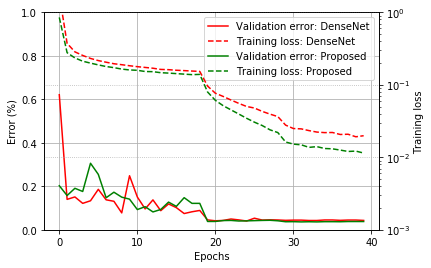

In [84]:
fig3 = plt.figure()
ax = plt.gca()
ax.set_xticks(np.arange(0, 41, 10))
ax.set_xlim([0,40])
#ax.set_yticks(np.arange(0.8, 1., 0.005))
ax.set_ylim([0,1])

axtrain = ax.twinx()

dnet= ax.plot(1-osvhntest['Value'],label = 'Validation error: DenseNet',color='r')
mynet1 = ax.plot(mysvhntest['Value'], label = 'Validation error: Proposed', color='g')
dnettrain = axtrain.plot(osvhntrain['Value'], label = 'Training loss: DenseNet',linestyle='--',color = 'r')
mynettrain = axtrain.plot(mysvhntrain['Value'], label = 'Training loss: Proposed' , linestyle='--', color = 'g')



ax.set_xlabel('Epochs')
ax.set_ylabel('Error (%)')
axtrain.set_ylabel('Training loss')

axtrain.set_yscale('log')
#axloss.semilogy(my562trainingloss,label='loss')
axtrain.set_ylim(([1e-3, 1e0]))
#print(len(lns2))
lns2 = dnet+dnettrain+mynet1+mynettrain
print(len(lns2))
labs2 = [l.get_label() for l in lns2]
ax.legend(lns2, labs2, loc='best')

ax.grid(True)

plt.grid(linestyle='dotted')

#ax.legend(loc='best')
#axtrain.legend(loc='best')

#axloss.set_yticks()
#axloss.set_yticklabels(y_labels)
plt.savefig('plot3.png', format='png', dpi=1000,bbox_inches='tight')
plt.show()



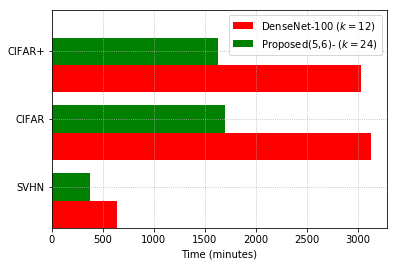

In [55]:
# df = pd.DataFrame(dict(graph=['SVHN', 'CIFAR-10','CIFAR-100'],orig=[961.24,0,0],multi=[379.29,0,0]))
# ind = np.arange(len(df))

# fig, ax3 = plt.subplots()
# ax.barh(ind,df.orig,0.4, color='r')
# plt.show()
df = pd.DataFrame(dict(graph=['SVHN', 'CIFAR', 'CIFAR+'],
                           n=[638.24, 3128.59, 3030.58], m=[379.29,1696.8,1632.44])) 

ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots()
ax.set_xlabel('Time (minutes)')
ax.barh(ind, df.n, width, color='red', label='DenseNet-100 $(k=12)$')
ax.barh(ind + width, df.m, width, color='green', label='Proposed(5,6)- $(k=24)$')

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.legend()
plt.grid(linestyle='dotted')

plt.savefig('plot4.png', format='png', dpi=1000,bbox_inches='tight')
plt.show()